In [29]:
%cd /rna/junyoung/prj/class/binfo1-work

/rna/junyoung/prj/class/binfo1-work


In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import gseapy as gp
import networkx as nx
from gprofiler import GProfiler

cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
print(len(cnts))
cnts.head()

55359


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,0,0,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,0,0,0


In [164]:
readcounts = 10
cnts = cnts.loc[cnts['CLIP-35L33G.bam'] > readcounts]
cnts

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000103161.2,chr1,3663115,3666126,-,3012,17,0,0,0,0,0,9,13,0,0
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,0,0,0,0,31,207,157,1,2
ENSMUSG00000102948.2,chr1;chr1,4326457;4329070,4326650;4330742,-;-,1867,60,0,0,0,0,1,1,2,0,0
ENSMUSG00000118917.1,chr1,4599240,4599346,+,107,15,0,0,0,1,0,0,0,1,1
ENSMUSG00000098104.2,chr1,4758157,4759626,-,1470,29,0,0,0,0,63,26,15,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,0,0,0,27,1976,6741,8052,11471,10842
ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,0,0,0,2,61,30,25,18,19
ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,0,0,0,11235,4561,11885,10971,13872,11329


In [165]:
total_counts = cnts.iloc[:,5:15]
total_counts.head()

,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,
ENSMUSG00000103161.2,17,0,0,0,0,0,9,13,0,0
ENSMUSG00000102343.2,67,0,0,0,0,31,207,157,1,2
ENSMUSG00000102948.2,60,0,0,0,0,1,1,2,0,0
ENSMUSG00000118917.1,15,0,0,0,1,0,0,0,1,1
ENSMUSG00000098104.2,29,0,0,0,0,63,26,15,2,7


In [166]:
rpm = total_counts.divide(total_counts.sum(axis=0)) * 1e6
rpm.head()

,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,
ENSMUSG00000103161.2,1.251401,NaN,NaN,0.0,0.000000,0.000000,0.734082,1.341112,0.000000,0.000000
ENSMUSG00000102343.2,4.931992,NaN,NaN,0.0,0.000000,6.094027,16.883891,16.196511,0.093945,0.155256
ENSMUSG00000102948.2,4.416709,NaN,NaN,0.0,0.000000,0.196582,0.081565,0.206325,0.000000,0.000000
ENSMUSG00000118917.1,1.104177,NaN,NaN,0.0,0.108699,0.000000,0.000000,0.000000,0.093945,0.077628
ENSMUSG00000098104.2,2.134743,NaN,NaN,0.0,0.000000,12.384636,2.120682,1.547437,0.187889,0.543395


In [167]:
cnts.iloc[:,5:15] = rpm
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000103161.2,chr1,3663115,3666126,-,3012,1.251401,NaN,NaN,0.0,0.000000,0.000000,0.734082,1.341112,0.000000,0.000000
ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,4.931992,NaN,NaN,0.0,0.000000,6.094027,16.883891,16.196511,0.093945,0.155256
ENSMUSG00000102948.2,chr1;chr1,4326457;4329070,4326650;4330742,-;-,1867,4.416709,NaN,NaN,0.0,0.000000,0.196582,0.081565,0.206325,0.000000,0.000000
ENSMUSG00000118917.1,chr1,4599240,4599346,+,107,1.104177,NaN,NaN,0.0,0.108699,0.000000,0.000000,0.000000,0.093945,0.077628
ENSMUSG00000098104.2,chr1,4758157,4759626,-,1470,2.134743,NaN,NaN,0.0,0.000000,12.384636,2.120682,1.547437,0.187889,0.543395


In [180]:
rpm_count = 5
cnts_sorted = cnts.loc[(cnts['RNA-control.bam'] > rpm_count) &
                       (cnts['RNA-siLin28a.bam'] > rpm_count) & 
                       (cnts['RNA-siLuc.bam'] > rpm_count) &
                       (cnts['RPF-siLin28a.bam'] > rpm_count) &
                       (cnts['RPF-siLuc.bam'] > rpm_count)
                       ]
cnts_sorted

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,295.477864,NaN,NaN,0.0,0.326098,266.367968,246.488497,264.405455,174.643264,247.710521
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,122.048405,NaN,NaN,0.0,65.980527,149.795123,173.732793,229.536534,30.813873,47.275371
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,81.782737,NaN,NaN,0.0,121.852011,93.179643,102.771511,106.360524,56.648676,87.564233
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,111.889973,NaN,NaN,0.0,27.283546,55.042827,56.605896,93.155726,12.400705,19.484594
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,258.230280,NaN,NaN,0.0,14.891816,103.991627,192.492672,183.113415,19.540505,10.712646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,39.235102,NaN,NaN,0.0,1871.042527,3270.723428,4125.215830,4067.696875,1996.607468,1347.231620
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,27.457211,NaN,NaN,0.0,262.074219,422.650281,410.107268,435.758346,309.266070,193.914410
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,269.787337,NaN,NaN,0.0,517.843874,1038.147038,1268.249386,1795.852579,562.353188,411.815831


In [169]:
total_gene_list = cnts_sorted.index.str.split('.').str[0].copy()
total_gene_list = total_gene_list.tolist()
total_gene_list[:5]
print(len(total_gene_list))
total_gene_list

7886


['ENSMUSG00000033845',
 'ENSMUSG00000033813',
 'ENSMUSG00000033793',
 'ENSMUSG00000025907',
 'ENSMUSG00000051285',
 'ENSMUSG00000061024',
 'ENSMUSG00000045210',
 'ENSMUSG00000098234',
 'ENSMUSG00000025917',
 'ENSMUSG00000056763',
 'ENSMUSG00000067851',
 'ENSMUSG00000016918',
 'ENSMUSG00000042414',
 'ENSMUSG00000005886',
 'ENSMUSG00000025935',
 'ENSMUSG00000025937',
 'ENSMUSG00000025930',
 'ENSMUSG00000025925',
 'ENSMUSG00000043716',
 'ENSMUSG00000025939',
 'ENSMUSG00000079658',
 'ENSMUSG00000025940',
 'ENSMUSG00000041859',
 'ENSMUSG00000025931',
 'ENSMUSG00000041779',
 'ENSMUSG00000025934',
 'ENSMUSG00000026155',
 'ENSMUSG00000026154',
 'ENSMUSG00000026153',
 'ENSMUSG00000067736',
 'ENSMUSG00000101111',
 'ENSMUSG00000100862',
 'ENSMUSG00000102070',
 'ENSMUSG00000073725',
 'ENSMUSG00000048874',
 'ENSMUSG00000026134',
 'ENSMUSG00000004768',
 'ENSMUSG00000042197',
 'ENSMUSG00000026131',
 'ENSMUSG00000042111',
 'ENSMUSG00000026127',
 'ENSMUSG00000037503',
 'ENSMUSG00000026123',
 'ENSMUSG00

In [170]:
total_gene_table = pd.concat([pd.Series(cnts_sorted.index.tolist()), pd.Series(total_gene_list)],axis=1, ignore_index=True)
total_gene_table = total_gene_table.set_index([0])
total_gene_table

,1
0,
ENSMUSG00000033845.14,ENSMUSG00000033845
ENSMUSG00000033813.16,ENSMUSG00000033813
ENSMUSG00000033793.13,ENSMUSG00000033793
ENSMUSG00000025907.15,ENSMUSG00000025907
ENSMUSG00000051285.18,ENSMUSG00000051285
...,...
ENSMUSG00000064351.1,ENSMUSG00000064351
ENSMUSG00000064363.1,ENSMUSG00000064363
ENSMUSG00000064367.1,ENSMUSG00000064367


In [181]:
cnts_sorted['clip_enrichment'] = cnts_sorted['CLIP-35L33G.bam']/cnts_sorted['RNA-control.bam'].copy()
cnts_sorted['rden_change'] = (cnts_sorted['RPF-siLin28a.bam']/cnts_sorted['RNA-siLin28a.bam']) / (cnts_sorted['RPF-siLuc.bam']/cnts_sorted['RNA-siLuc.bam']).copy()
cnts_sorted

/tmp/ipykernel_3615233/123156294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['clip_enrichment'] = cnts_sorted['CLIP-35L33G.bam']/cnts_sorted['RNA-control.bam'].copy()
/tmp/ipykernel_3615233/123156294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts_sorted['rden_change'] = (cnts_sorted['RPF-siLin28a.bam']/cnts_sorted['RNA-siLin28a.bam']) / (cnts_sorted['RPF-siLuc.bam']/cnts_sorted['RNA-siLuc.bam']).copy()


,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,295.477864,NaN,NaN,0.0,0.326098,266.367968,246.488497,264.405455,174.643264,247.710521,1.109285,0.756277
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,122.048405,NaN,NaN,0.0,65.980527,149.795123,173.732793,229.536534,30.813873,47.275371,0.814769,0.861155
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,81.782737,NaN,NaN,0.0,121.852011,93.179643,102.771511,106.360524,56.648676,87.564233,0.877689,0.669531
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,111.889973,NaN,NaN,0.0,27.283546,55.042827,56.605896,93.155726,12.400705,19.484594,2.032780,1.047377
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,258.230280,NaN,NaN,0.0,14.891816,103.991627,192.492672,183.113415,19.540505,10.712646,2.483183,1.735182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064351.1,chrM,5328,6872,+,1545,39.235102,NaN,NaN,0.0,1871.042527,3270.723428,4125.215830,4067.696875,1996.607468,1347.231620,0.011996,1.461344
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,27.457211,NaN,NaN,0.0,262.074219,422.650281,410.107268,435.758346,309.266070,193.914410,0.064964,1.694613
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,269.787337,NaN,NaN,0.0,517.843874,1038.147038,1268.249386,1795.852579,562.353188,411.815831,0.259874,1.933625


In [182]:
def batched(iterable, n): 
    items = []
    for item in iterable:
        items.append(item)
        if len(items) == n:
            yield items
            items = []
    if items:
        yield items

bm = gp.biomart.Biomart()
results = []

for batch in batched(total_gene_list, 300):
    res = bm.query(dataset='mmusculus_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name'],
                   filters={'ensembl_gene_id': batch})
    results.append(res)

results = pd.concat(results)
results

,ensembl_gene_id,external_gene_name
0,ENSMUSG00000001138,Cnnm3
1,ENSMUSG00000001143,Lman2l
2,ENSMUSG00000001674,Ddx18
3,ENSMUSG00000003051,Elf3
4,ENSMUSG00000003135,Cnot11
...,...,...
81,ENSMUSG00000079316,Rab9
82,ENSMUSG00000079435,Rpl36a
83,ENSMUSG00000082121,Gm8199
84,ENSMUSG00000095597,Rps7-ps3


In [ ]:
results = results.sort_values(by=['ensembl_gene_id'])
results = results.set_index('ensembl_gene_id')
results['external_gene_name'] = results['external_gene_name'].str.upper().dropna().drop_duplicates()
results

In [187]:
total_genenames = results['external_gene_name'].dropna().drop_duplicates().tolist()
print(len(total_genenames))
total_genenames

7886


['GNAI3',
 'CDC45',
 'NARF',
 'KLF6',
 'COX5A',
 'NGFR',
 'FER',
 'XPO6',
 'TFE3',
 'BRAT1',
 'DLAT',
 'SDHD',
 'CCND2',
 'GPR107',
 'GMPR',
 'TRIM25',
 'DGKE',
 'SCPEP1',
 'MNT',
 'HDDC2',
 'TPD52L1',
 'CDH1',
 'CDH4',
 'CKMT1',
 'COMT',
 'RTCA',
 'DBT',
 'DAZAP2',
 'MCTS1',
 'RNF17',
 'CCM2',
 'TBRG4',
 'NDUFA9',
 'LCK',
 'GALNT1',
 'MKRN2',
 'RAF1',
 'SEPTIN1',
 'TAMALIN',
 'ACVR1B',
 'TOM1L2',
 'GPA33',
 'ZFP385A',
 'ITGA5',
 'ATP5PB',
 'HNRNPD',
 'C1D',
 'GM2A',
 'KRIT1',
 'CLCN4',
 'HK2',
 'MYO18A',
 'KAT2B',
 'RAB5B',
 'DNMT3L',
 'AIRE',
 'ICOSL',
 'SPG7',
 'RPL13',
 'CHMP1A',
 'RPA1',
 'TUBGCP3',
 'POLR3D',
 'TCF7',
 'DDX3X',
 'USP32',
 'DNAJC5',
 'TPD52L2',
 'FMR1',
 'PXMP4',
 'GNB1L',
 'MMP11',
 'SMARCB1',
 'HIP1R',
 'NSUN5',
 'MMP14',
 'SLC7A7',
 'OXA1L',
 'HEATR6',
 'ILF2',
 'CHTOP',
 'SNAPIN',
 'S100A6',
 'MAPK7',
 'EPN2',
 'B9D1',
 'SEC24B',
 'N4BP3',
 'RMND5B',
 'NHP2',
 'MFSD10',
 'LUZP1',
 'KCTD10',
 'POLDIP2',
 'IFT20',
 'PCBP3',
 'ARAF',
 'TIMP1',
 'CNNM3',
 'LMAN2L'

In [188]:
cnts_ascending = pd.merge(total_gene_table, cnts_sorted, left_index=True, right_index=True, how='inner')
cnts_ascending = cnts_ascending.sort_values(by=[1])
cnts_ascending = cnts_ascending.set_index([1])
cnts_ascending

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
1,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,145.825024,NaN,NaN,0.0,0.000000,140.948954,121.612955,187.446239,32.035155,50.613369,1.034595,0.975570
ENSMUSG00000000028,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,37.468419,NaN,NaN,0.0,0.000000,98.880508,84.093197,98.520175,20.855731,30.585379,0.378926,0.798870
ENSMUSG00000000056,chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr1...,121128079;121129245;121133327;121135364;121135...,121128177;121129343;121133470;121135552;121135...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,4806,17.446002,NaN,NaN,0.0,19.457190,38.726561,37.275064,39.511233,12.494650,13.895388,0.450492,0.953138
ENSMUSG00000000078,chr13;chr13;chr13;chr13;chr13;chr13;chr13;chr1...,5911481;5911540;5913557;5914677;5914767;591476...,5911841;5911841;5913624;5915343;5915343;591534...,+;+;+;+;+;+;+;+;+;+;+,4391,44.167095,NaN,NaN,0.0,16.087509,34.008604,37.682887,44.875682,12.024926,11.566552,1.298704,1.238071
ENSMUSG00000000088,chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;c...,57428557;57428562;57428616;57436239;57436239;5...,57428698;57428698;57428698;57436355;57436355;5...,+;+;+;+;+;+;+;+;+;+;+;+,2101,70.299292,NaN,NaN,0.0,247.508501,138.000231,92.902183,75.308616,230.164602,176.913907,0.509414,1.054618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118671,chr15;chr15;chr15,75973330;75988903;76003309,75976551;75996925;76004395,-;-;-,12332,27.457211,NaN,NaN,0.0,0.000000,20.641060,41.271734,23.830535,16.722163,16.146596,1.330223,0.597988
ENSMUSG00000119584,chr17,40157244,40159092,+,1849,180447.536337,NaN,NaN,0.0,599942.563245,23537.492422,17497.094462,24502.431849,441372.848243,429395.282027,7.666387,1.439433
ENSMUSG00000119730,chr8,124275695,124275813,-,119,172.178058,NaN,NaN,0.0,0.000000,23.786365,19.901785,40.749182,50.072544,103.322690,7.238519,0.992272


In [189]:
total_results = pd.merge(results, cnts_ascending, left_index=True, right_index=True, how='inner')
total_results

,external_gene_name,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
ensembl_gene_id,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,GNAI3,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,145.825024,NaN,NaN,0.0,0.000000,140.948954,121.612955,187.446239,32.035155,50.613369,1.034595,0.975570
ENSMUSG00000000028,CDC45,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,37.468419,NaN,NaN,0.0,0.000000,98.880508,84.093197,98.520175,20.855731,30.585379,0.378926,0.798870
ENSMUSG00000000056,NARF,chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr1...,121128079;121129245;121133327;121135364;121135...,121128177;121129343;121133470;121135552;121135...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,4806,17.446002,NaN,NaN,0.0,19.457190,38.726561,37.275064,39.511233,12.494650,13.895388,0.450492,0.953138
ENSMUSG00000000078,KLF6,chr13;chr13;chr13;chr13;chr13;chr13;chr13;chr1...,5911481;5911540;5913557;5914677;5914767;591476...,5911841;5911841;5913624;5915343;5915343;591534...,+;+;+;+;+;+;+;+;+;+;+,4391,44.167095,NaN,NaN,0.0,16.087509,34.008604,37.682887,44.875682,12.024926,11.566552,1.298704,1.238071
ENSMUSG00000000088,COX5A,chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;c...,57428557;57428562;57428616;57436239;57436239;5...,57428698;57428698;57428698;57436355;57436355;5...,+;+;+;+;+;+;+;+;+;+;+;+,2101,70.299292,NaN,NaN,0.0,247.508501,138.000231,92.902183,75.308616,230.164602,176.913907,0.509414,1.054618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118671,EPPK1,chr15;chr15;chr15,75973330;75988903;76003309,75976551;75996925;76004395,-;-;-,12332,27.457211,NaN,NaN,0.0,0.000000,20.641060,41.271734,23.830535,16.722163,16.146596,1.330223,0.597988
ENSMUSG00000119584,RN18S-RS5,chr17,40157244,40159092,+,1849,180447.536337,NaN,NaN,0.0,599942.563245,23537.492422,17497.094462,24502.431849,441372.848243,429395.282027,7.666387,1.439433
ENSMUSG00000119730,N-R5S106,chr8,124275695,124275813,-,119,172.178058,NaN,NaN,0.0,0.000000,23.786365,19.901785,40.749182,50.072544,103.322690,7.238519,0.992272


In [190]:
enr = gp.enrichr(gene_list=total_genenames,
                 gene_sets= ['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                 organism='Mouse',
                 outdir= None,
                 cutoff=0.1)
enr.res2d.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,RNA Binding (GO:0003723),1093/1411,1.747918e-200,1.872021e-197,0,0,5.968514,2745.269140,POP5;RAMAC;POP7;SLC4A1AP;TFRC;POP1;POP4;NOC2L;...
1,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),236/319,1.648822e-36,8.829440e-34,0,0,4.471716,368.438098,RPL34;ENO1;F11R;FNBP1L;RPL6;CRKL;GOLGA2;GOLGA3...
2,GO_Molecular_Function_2023,mRNA Binding (GO:0003729),206/282,9.884574e-31,3.528793e-28,0,0,4.248609,293.532826,EIF4A1;RPL5;SLC4A1AP;EIF4A3;HNRNPU;HNRNPR;RPL7...
3,GO_Molecular_Function_2023,Ubiquitin-Like Protein Ligase Binding (GO:0044...,192/289,8.947298e-21,2.395639e-18,0,0,3.091529,142.714070,RPL5;UBE2D3;SMC6;AUP1;CASC3;CLU;HAPSTR1;UBE2L3...
4,GO_Molecular_Function_2023,Ubiquitin Protein Ligase Binding (GO:0031625),181/271,4.846491e-20,1.038118e-17,0,0,3.138430,139.576782,RPL5;UBE2D3;SMC6;AUP1;CASC3;CLU;HAPSTR1;UBE2L3...


In [191]:
term_table_expanded = enr.res2d.set_index('Term')['Genes'].str.split(';', expand=True).stack().reset_index(name='external_gene_name')
term_table_expanded

,Term,level_1,external_gene_name
0,RNA Binding (GO:0003723),0,POP5
1,RNA Binding (GO:0003723),1,RAMAC
2,RNA Binding (GO:0003723),2,POP7
3,RNA Binding (GO:0003723),3,SLC4A1AP
4,RNA Binding (GO:0003723),4,TFRC
...,...,...,...
19574,Chemokine Activity (GO:0008009),0,KLF5
19575,Chemokine Activity (GO:0008009),1,ENC1
19576,CCR Chemokine Receptor Binding (GO:0048020),0,NARS1
19577,CCR Chemokine Receptor Binding (GO:0048020),1,CNIH4


In [192]:
total_results['external_gene_name'] = total_results['external_gene_name'].str.upper()
total_results.head(2)

,external_gene_name,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
ensembl_gene_id,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,GNAI3,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,108014596;108016719;108019251;108019789;108023...,108016632;108016928;108019404;108019918;108023...,-;-;-;-;-;-;-;-;-,3262,145.825024,NaN,NaN,0.0,0.0,140.948954,121.612955,187.446239,32.035155,50.613369,1.034595,0.97557
ENSMUSG00000000028,CDC45,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,18599197;18599203;18600646;18600646;18603556;1...,18599323;18599323;18600712;18600712;18603632;1...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3506,37.468419,NaN,NaN,0.0,0.0,98.880508,84.093197,98.520175,20.855731,30.585379,0.378926,0.79887


In [193]:
merged_table = pd.merge(term_table_expanded, total_results, on='external_gene_name')
merged_table.head(2)

,Term,level_1,external_gene_name,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7d.bam,CLIP-let7f-1.bam,CLIP-let7g.bam,filtered-RPF-siLuc.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
0,RNA Binding (GO:0003723),0,POP5,chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;c...,115373895;115375883;115376038;115376091;115376...,115373943;115376128;115376336;115376128;115376...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,2296,22.893277,NaN,NaN,0.0,58.154171,35.188093,34.583429,36.725845,44.999528,41.608536,0.650597,1.148495
1,"RNA Endonuclease Activity, Producing 5'-Phosph...",0,POP5,chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;c...,115373895;115375883;115376038;115376091;115376...,115373943;115376128;115376336;115376128;115376...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,2296,22.893277,NaN,NaN,0.0,58.154171,35.188093,34.583429,36.725845,44.999528,41.608536,0.650597,1.148495


In [194]:
term_stats = merged_table.groupby('Term').agg(
    avg_enrichment=('clip_enrichment', 'mean'),
    avg_change=('rden_change', 'mean'),
    gene_count=('external_gene_name', 'count')
).reset_index()
term_stats

,Term,avg_enrichment,avg_change,gene_count
0,1-Acylglycerol-3-Phosphate O-acyltransferase A...,1.264558,1.377145,14
1,1-Acylglycerophosphocholine O-acyltransferase ...,0.978326,1.049641,4
2,1-Alkyl-2-Acetylglycerophosphocholine Esterase...,0.624424,0.843301,5
3,1-Phosphatidylinositol Binding (GO:0005545),0.837325,0.826128,9
4,1-Phosphatidylinositol-3-Kinase Activity (GO:0...,1.028635,0.690598,3
...,...,...,...,...
1066,tRNA (Guanine) Methyltransferase Activity (GO:...,0.627976,0.723706,11
1067,tRNA Binding (GO:0000049),0.608068,0.732078,37
1068,tRNA Methyltransferase Activity (GO:0008175),0.501367,0.612751,4
1069,tRNA-specific Adenosine Deaminase Activity (GO...,0.754208,0.737137,3


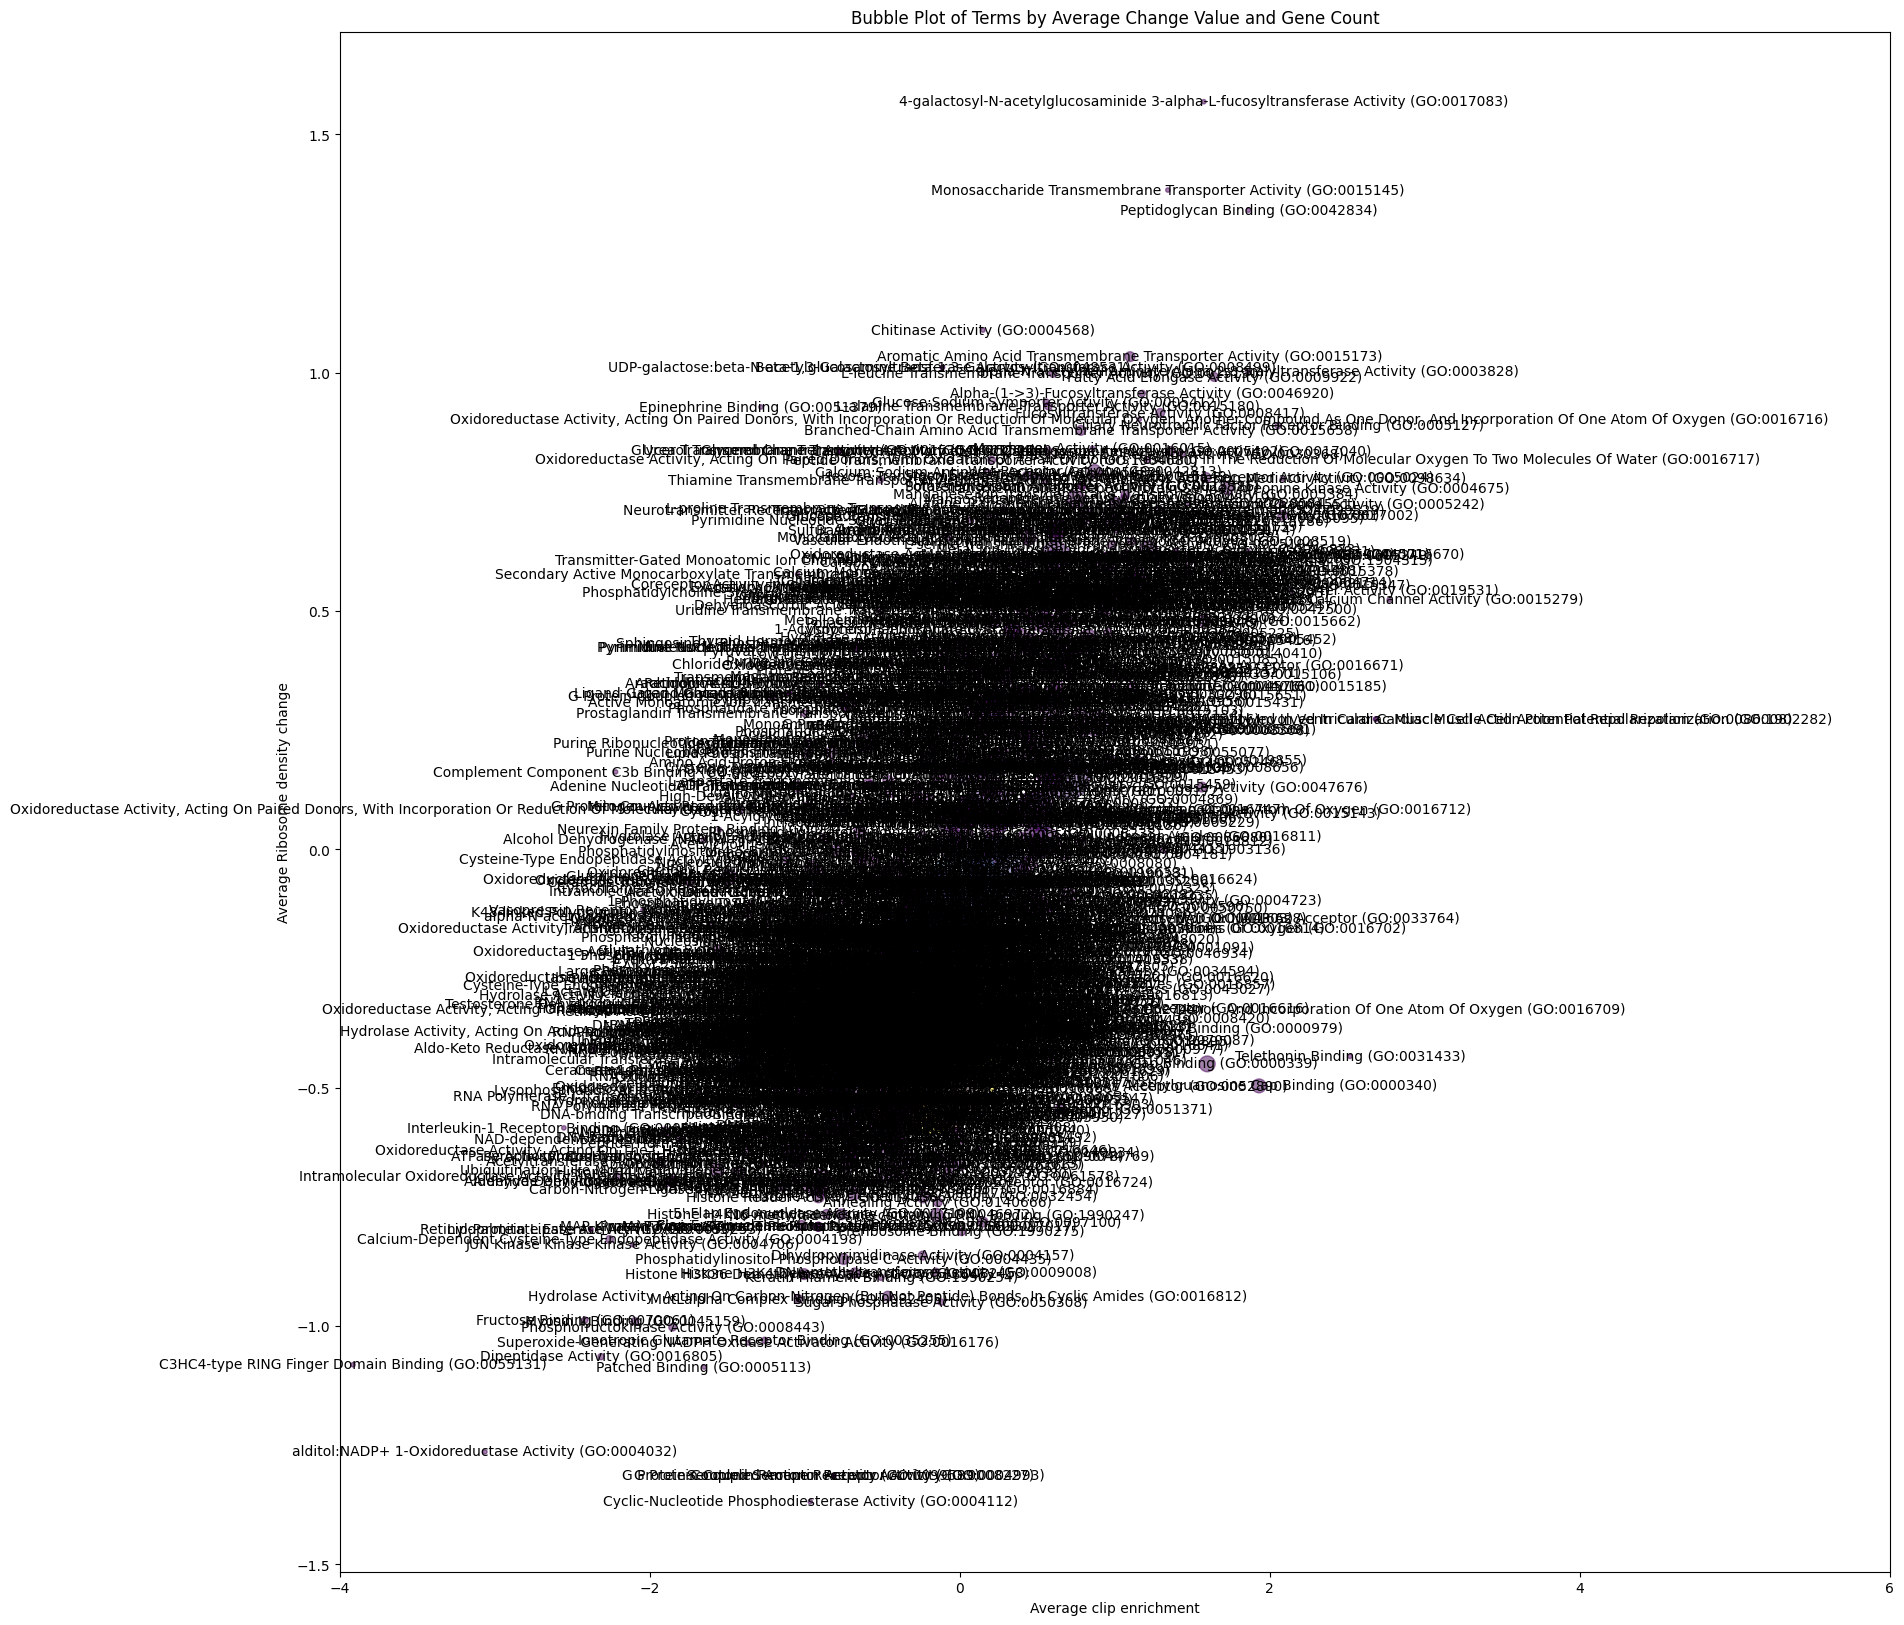

In [226]:
plt.figure(figsize=(20, 20))
bubble = plt.scatter(
    np.log2(term_stats['avg_enrichment']),
    np.log2(term_stats['avg_change']),
    s=term_stats['gene_count']*10,  # Scale the bubble size
    c=term_stats['gene_count'],  # Use gene count for color
    cmap='viridis',
    alpha=0.5
)

for i, row in term_stats.iterrows():
    plt.text(np.log2(row['avg_enrichment']), np.log2(row['avg_change']), row['Term'], fontsize=10, ha='center', va='center')


plt.xlabel('Average clip enrichment')
plt.ylabel('Average Ribosome density change')
plt.title('Bubble Plot of Terms by Average Change Value and Gene Count')

plt.xlim(-4,6)
plt.show()

Preranked_clip GO term analysis

In [197]:
preranked_clip = total_results.iloc[:,[0,16]].copy()
preranked_clip['external_gene_name'] = preranked_clip['external_gene_name'].str.upper().dropna().drop_duplicates()
preranked_clip = preranked_clip.sort_values(by='clip_enrichment', ascending = True).dropna()
preranked_clip =  preranked_clip.reset_index(drop=True)
preranked_clip['log2FC_clip_enrichment'] = np.log2(preranked_clip['clip_enrichment']).copy()
preranked_clip = preranked_clip.drop('clip_enrichment', axis=1)
preranked_clip

,external_gene_name,log2FC_clip_enrichment
0,MT-ND1,-6.720701
1,MT-CO1,-6.381321
2,GM4149,-5.963023
3,GM28661,-5.803437
4,SNHG20,-5.522653
...,...,...
7881,RN18S-RS5,2.938547
7882,NECTIN3,2.953980
7883,PGRMC1,4.044339
7884,NCBP3,5.067487


In [ ]:
pre_res_clip = gp.prerank(preranked_clip, gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                     permutation_num=1000, threads=64,
                     outdir=None,
                     ascending=False,
                     min_size=15,
                     max_size=500,
                     format='png', seed=42, verbose=True)
pre_res_clip.res2d.head(10)

2024-06-10 10:34:28,165 [WARNING] Duplicated values found in preranked stats: 11.35% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-06-10 10:34:28,165 [INFO] Parsing data files for GSEA.............................
2024-06-10 10:34:28,166 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-10 10:34:28,189 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-10 10:34:28,195 [INFO] Enrichr library gene sets already downloaded in: /rna/junyoung/.cache/gseapy, use local file
2024-06-10 10:34:28,231 [INFO] 4704 gene_sets have been filtered out when max_size=500 and min_size=15
2024-06-10 10:34:28,232 [INFO] 2324 gene_sets used for further statistical testing.....
2024-06-10 10:34:28,233 [INFO] Start to run GSEA...Might take a while..................
2024-06-10 10:34:38,307 [INFO] Congratulations. GSEApy runs successfully.............

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Biological_Process_2023__Sphingolipid Biosy...,0.564049,2.826801,0.0,0.002685,0.001,26/51,11.74%,KDSR;ELOVL4;ACER3;SPTLC2;ORMDL1;SPTLC1;ELOVL7;...
1,prerank,GO_Molecular_Function_2023__Transmembrane Rece...,0.696616,2.79936,0.0,0.001342,0.001,14/27,13.24%,MERTK;MET;FGFR2;INSR;IGF1R;KIT;IGF2R;TEK;CRIM1...
2,prerank,GO_Biological_Process_2023__Endoplasmic Reticu...,0.772771,2.710401,0.0,0.000895,0.001,10/15,13.75%,LNPK;RTN4;RTN3;RTN1;RAB10;RETREG3;REEP3;ATL2;R...
3,prerank,GO_Molecular_Function_2023__Transmembrane Rece...,0.700033,2.672762,0.0,0.000671,0.001,10/19,13.24%,MERTK;ACVR2A;BMPR1B;KIT;TEK;DDR2;BMPR1A;ACVR1B...
4,prerank,GO_Molecular_Function_2023__Metal Ion Transmem...,0.702761,2.656345,0.0,0.000537,0.001,13/19,16.15%,CNNM4;ATP2B1;SLC12A2;SLC8A2;TMEM165;MAGT1;ATP2...
5,prerank,GO_Biological_Process_2023__Proteoglycan Biosy...,0.685054,2.563549,0.0,0.000447,0.001,11/20,13.71%,CSGALNACT2;XYLT1;BMPR1B;BMPR2;GLCE;CHST11;HS3S...
6,prerank,GO_Biological_Process_2023__Membrane Lipid Bio...,0.535832,2.553034,0.0,0.000384,0.001,21/42,11.74%,KDSR;ELOVL4;ACER3;SPTLC2;ORMDL1;SPTLC1;ST8SIA6...
7,prerank,GO_Biological_Process_2023__Positive Regulatio...,0.643303,2.483182,0.0,0.002014,0.006,12/19,16.29%,ACVR2A;ATP2B1;BMPR1B;BMPR2;ADGRV1;BMPR1A;P2RX7...
8,prerank,GO_Biological_Process_2023__Glycoprotein Biosy...,0.483759,2.48034,0.0,0.00179,0.006,20/50,9.69%,ATP7A;GCNT1;CSGALNACT2;XYLT1;BMPR1B;BMPR2;ALG5...
9,prerank,GO_Molecular_Function_2023__Transition Metal I...,0.606677,2.474994,0.0,0.001611,0.006,15/25,13.41%,SLC30A1;SLC39A10;TTYH1;SLC39A1;TMEM165;SLC39A9...


In [ ]:
term_table_expanded_clip = pre_res_clip.res2d.set_index('Term')['Lead_genes'].str.split(';', expand=True).stack().reset_index(name='external_gene_name')
term_table_expanded_clip

,Term,level_1,external_gene_name
0,GO_Biological_Process_2023__Sphingolipid Biosy...,0,KDSR
1,GO_Biological_Process_2023__Sphingolipid Biosy...,1,ELOVL4
2,GO_Biological_Process_2023__Sphingolipid Biosy...,2,ACER3
3,GO_Biological_Process_2023__Sphingolipid Biosy...,3,SPTLC2
4,GO_Biological_Process_2023__Sphingolipid Biosy...,4,ORMDL1
...,...,...,...
42948,GO_Biological_Process_2023__Cellular Response ...,12,YAP1
42949,GO_Biological_Process_2023__Cellular Response ...,13,GRB2
42950,GO_Biological_Process_2023__Cellular Response ...,14,INTS7
42951,GO_Biological_Process_2023__Cellular Response ...,0,NR4A1


In [ ]:
merged_table_clip = pd.merge(term_table_expanded_clip, preranked_clip, on='external_gene_name')
merged_table_clip

In [ ]:
term_stats_clip = merged_table_clip.groupby('Term').agg(
    avg_enrichment=('clip_enrichment', 'mean'),
    gene_count_clip=('external_gene_name', 'count')
).reset_index()
term_stats_clip

In [ ]:
plt.figure(figsize=(10, 8))
bubble = plt.scatter(
    term_stats_clip['avg_enrichment'],
    term_stats_clip['Term'],
    s=term_stats_clip['gene_count_clip'],  # Scale the bubble size
    c=term_stats_clip['gene_count_clip'],  # Use gene count for color
    cmap='viridis',
    alpha=0.5
)

plt.xlabel('Average Enrichment Value')
plt.ylabel('Term')
plt.title('Bubble Plot of Terms by Average Enrichment Value and Gene Count')

plt.show()

Ribosome density GO term analysis

In [ ]:
preranked_rdc = total_results.iloc[:,[0,17]].copy()
preranked_rdc['external_gene_name'] = preranked_rdc['external_gene_name'].str.upper().dropna().drop_duplicates()
preranked_rdc = preranked_rdc.sort_values(by='rden_change', ascending = True).dropna()
preranked_rdc =  preranked_rdc.reset_index(drop=True)
preranked_rdc['log2FC_rden_change'] = np.log2(preranked_rdc['rden_change']).copy()
preranked_rdc = preranked_rdc.drop('rden_change', axis=1)
preranked_rdc

In [ ]:
pre_res_rdc = gp.prerank(preranked_rdc, gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023'],
                     permutation_num=1000, threads=64,
                     outdir=None,
                     ascending=False,
                     min_size=15,
                     max_size=500,
                     format='png', seed=42, verbose=True)
pre_res_rdc.res2d.head(10)

In [ ]:
term_table_expanded_rdc = pre_res_rdc.res2d.set_index('Term')['Lead_genes'].str.split(';', expand=True).stack().reset_index(name='external_gene_name')
term_table_expanded_rdc

In [ ]:
merged_table_rdc = pd.merge(term_table_expanded_rdc, preranked_rdc, on='external_gene_name')
merged_table_rdc

In [ ]:
term_stats_rdc = merged_table_rdc.groupby('Term').agg(
    avg_change=('rden_change', 'mean'),
    gene_count_rdc=('external_gene_name', 'count')
).reset_index()
term_stats_rdc

In [ ]:
plt.figure(figsize=(10, 8))
bubble = plt.scatter(
    term_stats_rdc['avg_change'],
    term_stats_rdc['Term'],
    s=term_stats_rdc['gene_count_rdc'],  # Scale the bubble size
    c=term_stats_rdc['gene_count_rdc'],  # Use gene count for color
    cmap='viridis',
    alpha=0.5
)

plt.xlabel('Average Change Value')
plt.ylabel('Term')
plt.title('Bubble Plot of Terms by Average Change Value and Gene Count')

plt.show()

In [ ]:
preranked_total = pd.merge(term_stats_clip, term_stats_rdc, on='Term' )
preranked_total

G:profiler GO term analysis

In [196]:
gp2 = GProfiler(return_dataframe=True)

In [198]:
prerank_result = gp2.profile(organism='mmusculus', query=preranked_clip.iloc[:,0].tolist(), sources=["GO:BP", "GO:MF", "GO:CC"], ordered=True, no_evidences=False, no_iea=True)
prerank_result.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,GO:CC,GO:0005622,intracellular anatomical structure,4.940656e-324,True,"""A component of a cell contained within (but n...",12854,5314,4285,21823,0.806361,0.333359,query_1,[GO:0110165],"[MT-ND1, MT-CO1, FAU, MT-CYTB, HSPB1, SFN, CBR...","[[HDA, ISS, ISO, IBA], [IDA, HDA, ISO, IBA], [..."
1,GO:CC,GO:0043226,organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",11685,6228,4589,21823,0.736834,0.392726,query_1,[GO:0110165],"[MT-ND1, MT-CO1, FAU, MT-CYTB, HSPB1, SFN, CBR...","[[HDA, ISS, ISO, IBA], [IDA, HDA, ISO, IBA], [..."
2,GO:CC,GO:0043227,membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",10808,6497,4501,21823,0.692781,0.416451,query_1,[GO:0043226],"[MT-ND1, MT-CO1, FAU, MT-CYTB, HSPB1, SFN, CBR...","[[HDA, ISS, ISO, IBA], [IDA, HDA, ISO, IBA], [..."
3,GO:CC,GO:0043229,intracellular organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",11336,5850,4273,21823,0.730427,0.376941,query_1,"[GO:0005622, GO:0043226]","[MT-ND1, MT-CO1, FAU, MT-CYTB, HSPB1, SFN, CBR...","[[HDA, ISS, ISO, IBA], [IDA, HDA, ISO, IBA], [..."
4,GO:CC,GO:0043231,intracellular membrane-bounded organelle,4.940656e-324,True,"""Organized structure of distinctive morphology...",10337,6184,4196,21823,0.678525,0.405920,query_1,"[GO:0043227, GO:0043229]","[MT-ND1, MT-CO1, FAU, MT-CYTB, HSPB1, SFN, CBR...","[[HDA, ISS, ISO, IBA], [IDA, HDA, ISO, IBA], [..."


In [202]:
prerank_result.loc[prerank_result['native'] == 'GO:0005634']

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
13,GO:CC,GO:0005634,nucleus,4.585312e-273,True,"""A membrane-bounded organelle of eukaryotic ce...",6440,7113,3237,21823,0.455082,0.50264,query_1,[GO:0043231],"[FAU, HSPB1, SFN, CBR3, UTF1, ID1, GAPDH, UBB,...","[[ISO], [IDA, ISO, IBA], [IDA], [ISO], [IDA, I..."
